
# Project: How to Improve Patient Attendance and Reduce No-Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, we'll be analysing data for 100k medical appointments in Brazil. Our focus is on identifying the key factors that can predict if a patient with show up for their scheduled appointments, which in turn, enables us to hypothesize ways to improve patient attendance and reduce no-shows. Missed appointments not only impact the health care system financially, but also, compromise the effectiveness of clinical providers and results in loss opportunity for the continuity of care of patients ([Cashman et al, 2004](https://muse.jhu.edu/article/171903/pdf)). 

In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load data set
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
# View first few lines of the data set;
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Inspect number of appointments and columns 
df.shape

(110527, 14)

In [6]:
# Inspect data types and check for missing values; 
# no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# Check for errant data;
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


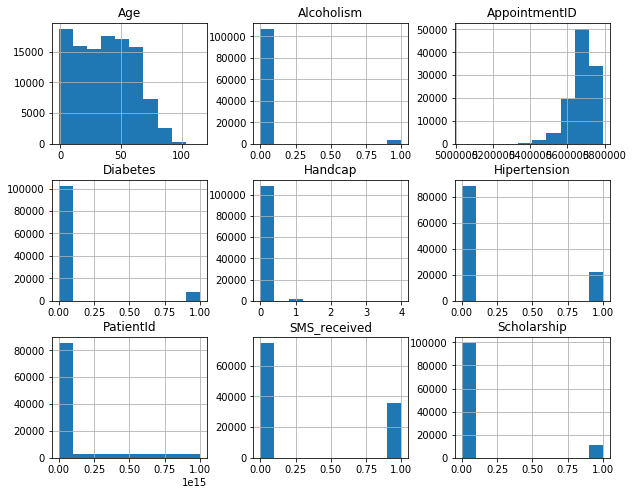

In [8]:
# Check histograms for whole data set;
# note the impact of the outliers in Age on subsequent analysis
df.hist(figsize=(10,8));

In [9]:
# Check for duplicate values
df[df.duplicated()].sum()

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
No-show           0.0
dtype: float64

### Data Cleaning (Replace this with more specific notes!)

In [10]:
# Replace headers with lower case labels, dashes with underscores and separate out two-word headers with underscores
df.rename(columns=lambda x: x.lower().replace('-', '_').replace('id', '_id').replace('day', '_day'), inplace=True)

In [11]:
# Confirm changes
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [12]:
# Convert scheduled_day and appointment_day columns to datetime format
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [13]:
# Confirm datetime changes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hipertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [14]:
# Replace no_show column with numeric values for ease of calculation later
df['no_show'].replace({"No":0, "Yes":1}, inplace=True)

In [15]:
# Confirm changes
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What is the rate of no-shows in the 27-day sample period? 

In [16]:
# Proportion of no-show appointments out of total number of appointments;
# 20% no-show rate
len(df.query("no_show == True")) / df.shape[0]

0.20193255946510807

In [17]:
# Average number of appointments per patient
# 1-2 appointments per patient on average
len(df.query("no_show == False")) / df.patient_id.nunique()

1.4158814748230308

### Research Question 2: What are the demographics of patients who are more likely to not show up?

In [18]:
# Expression for no_show values
show_up = df.no_show == False
no_show = df.no_show == True

In [19]:
# Average age of no-shows;
# patients who are more likely to miss appointments are generally younger 
df.age[show_up].median(), df.age[no_show].median()

(38.0, 33.0)

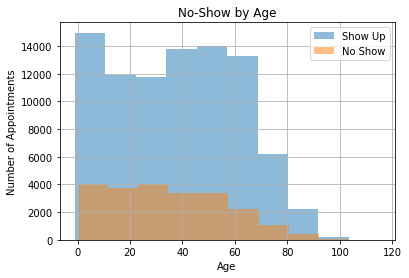

In [20]:
# Histogram chart, no-show vs age
# patients in the age groups 55 and below and older than 90 years are more likely to miss appointments
df.age[show_up].hist(alpha=0.5, label='Show Up')
df.age[no_show].hist(alpha=0.5, label='No Show')
plt.title('No-Show by Age')
plt.xlabel('Age')
plt.ylabel('Number of Appointments')
plt.legend();

In [21]:
# Validate mix of gender; 
# there are more appointments made by females than males
len(df.query("gender == 'F'")) / df.shape[0]

0.6499769287142508

In [22]:
# Median age by gender;
# female patients in this sample are generally older
df.query('gender == "F"')['age'].median(), df.query('gender == "M"')['age'].median()

(39.0, 33.0)

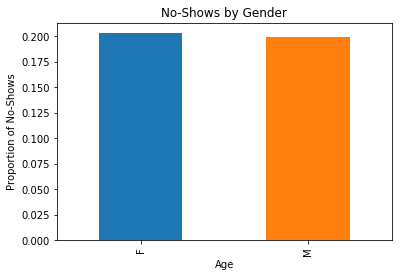

In [23]:
# Bar chart, proportion of no-shows by gender
df.groupby('gender').no_show.mean().plot(kind='bar')
plt.title('No-Shows by Gender')
plt.xlabel('Age')
plt.ylabel('Proportion of No-Shows');

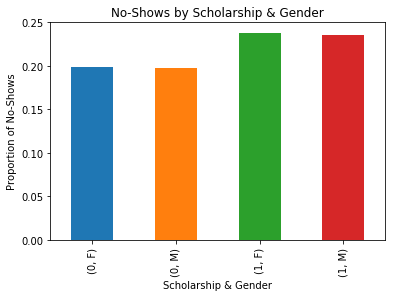

In [45]:
# Use scholarship as a proxy for socioeconomic deprivations;
# When you separate out gender by scholarship, it appears that there is minimal difference in no-show rates between gender. 
# However, those who are enrolled in the Bolsa Familiar scholarship program are more likely to not show up for appointments.
df.groupby(['scholarship', 'gender']).no_show.mean().plot(kind='bar');
plt.title('No-Shows by Scholarship & Gender')
plt.xlabel('Scholarship & Gender')
plt.ylabel('Proportion of No-Shows');

### Research Question 3: What is the effect of diseases and / or disabilities on patient attendance?

In [25]:
# No_shows vs hipertension;
# while a quarter of the appointments were associated with patients with hipertension,
# patients without hipertension were a touch more likely to miss appointments 
df.groupby('hipertension')['no_show'].mean()

hipertension
0    0.209037
1    0.173020
Name: no_show, dtype: float64

In [26]:
# No_shows vs diabetes;
# patients without diabetes were a touch more likely to miss appointments
df.groupby('diabetes')['no_show'].mean()

diabetes
0    0.203628
1    0.180033
Name: no_show, dtype: float64

In [27]:
# No_shows vs alcoholism;
# there wasn't much difference in patient attendance for those with or without alcoholism 
df.groupby('alcoholism')['no_show'].mean()

alcoholism
0    0.201946
1    0.201488
Name: no_show, dtype: float64

In [31]:
# Validate the number of handcap elements;
# per Kaggle discussion forum, handcap represents the number of disabilities
df.handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

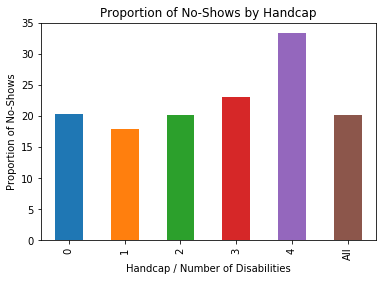

In [32]:
# Histogram chart, proportion of no-shows by number of disabilities
# proportion of no-shows increases with the handcap
result = pd.crosstab(index=df['handcap'], columns=df['no_show'], margins=True)
result = result.rename(columns={False:'show_up', True:'no_show'})
result['proportion'] = result['no_show'] / result['All']*100
result['proportion'].plot(kind='bar')
plt.title('Proportion of No-Shows by Handcap')
plt.xlabel('Handcap / Number of Disabilities')
plt.ylabel('Proportion of No-Shows');

In [33]:
# General observations about handcap;
# Patients with disabilities, on average, are more likely to be 1) older, 2) suffer from hipertension and diabetes, 3) and not receive text reminders
df.groupby('handcap').mean()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,sms_received,no_show
handcap,,,,,,,,,
0,1.478153e+14,5.675150e+06,36.810465,0.098655,0.192389,0.069667,0.030309,0.322719,0.202353
1,1.322588e+14,5.683177e+06,50.855044,0.078355,0.432419,0.174339,0.034280,0.239471,0.179236
2,1.235427e+14,5.678123e+06,47.775956,0.098361,0.459016,0.234973,0.027322,0.234973,0.202186
3,1.576761e+14,5.674417e+06,48.615385,0.000000,0.076923,0.000000,0.230769,0.230769,0.230769
4,4.215626e+14,5.749102e+06,14.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333


### Research Question 4: What is the effect of waiting times on patient attendance? 

In [34]:
# dt.normalize to ignore hours 
df['waiting_days'] = df['appointment_day'].sub(df['scheduled_day'].dt.normalize(), axis=0) / np.timedelta64(1, 'D')

In [35]:
# Confirm changes;
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,waiting_days
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0.0


In [36]:
# Exclude any rows with waiting_days less than 0 
df1 = df[df.waiting_days >= 0]

In [37]:
# Confirm changes;
# more than half of appointments are delayed by more than 3-4 days
df1['waiting_days'].describe()

count    110522.000000
mean         10.184253
std          15.255115
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: waiting_days, dtype: float64

In [38]:
# Compare the average number of waiting days vs no-show;
# no-shows correlate with much longer appointment delays 
df1.waiting_days[show_up].mean(), df1.waiting_days[no_show].mean()

(8.7546594413205145, 15.835484449224701)

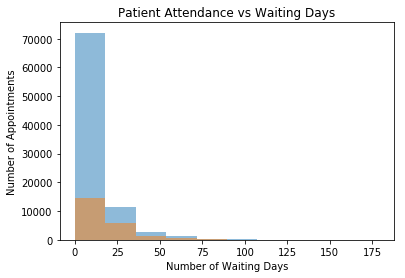

In [39]:
# Histogram, patient attendance by number of waiting days 
df1.waiting_days[show_up].plot(kind='hist', alpha=0.5, label="Show Up")
df1.waiting_days[no_show].plot(kind='hist', alpha=0.5, label="No Show")
plt.title('Patient Attendance vs Waiting Days')
plt.xlabel('Number of Waiting Days')
plt.ylabel('Number of Appointments')
plt.legend;

### Research Question 5: Will patients be more likely to show up if they are sent an sms?

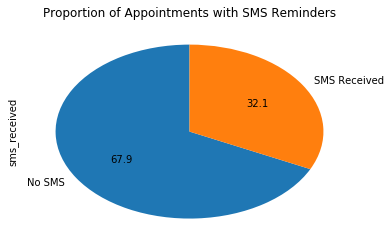

In [40]:
# Pie chart, proportion of appointments that were preceded by text reminders;
# one-third of all appointments were preceded by a SMS 
df.sms_received.value_counts().plot(kind='pie', autopct='%1.1f', startangle=90, labels=['No SMS', "SMS Received"])
plt.title('Proportion of Appointments with SMS Reminders');

Text(0,0.5,'Proportion of No-Shows')

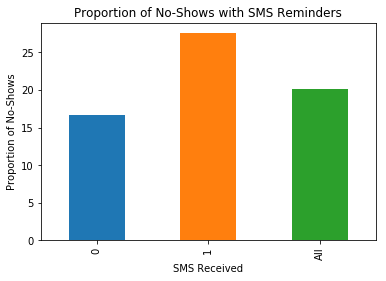

In [41]:
# Bar chart, proportion of patient attendance with text reminders;
# patients were more likely to miss appointments if they received a SMS
result = pd.crosstab(index=df['sms_received'], columns=df['no_show'], margins=True)
result = result.rename(columns={False:'show_up', True:'no_show'})
result['proportion'] = result['no_show'] / result['All']*100
result['proportion'].plot(kind='bar')
plt.title('Proportion of No-Shows with SMS Reminders')
plt.xlabel('SMS Received')
plt.ylabel('Proportion of No-Shows')

In [42]:
# Compare the average waiting days for appointments with text reminders and those without;
# patients who received text reminders had longer appointment delays
sms_yes = df.sms_received == True
sms_no = df.sms_received == False
df1.waiting_days[sms_yes].mean(), df1.waiting_days[sms_no].mean()

(19.016712699396876, 6.0079024520255864)

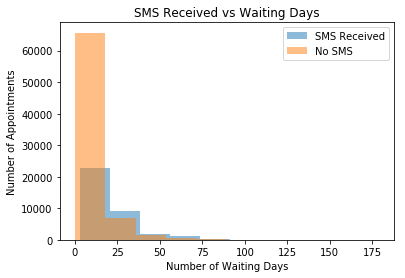

In [43]:
# Histogram chart, sms received vs waiting days;
df1.waiting_days[sms_yes].plot(kind='hist', alpha=0.5, label="SMS Received")
df1.waiting_days[sms_no].plot(kind='hist', alpha=0.5, label="No SMS")
plt.title('SMS Received vs Waiting Days')
plt.xlabel('Number of Waiting Days')
plt.ylabel('Number of Appointments')
plt.legend();

<a id='conclusions'></a>
## Conclusions

> Nearly 20% of patients did not attend more than two appointments in the 27-day sample period.

> When we analysed the data by demographics, it appears that patients in the age groups 55 and below and older than 90 years are more likely to miss appointments. While women do make more appointments and are generally older than men, they are no more likely to miss appointments. That said, socio-economic deprivation, as proxied by enrollment in the Bolsa Familia program is an important factor in predicting the likelihood of no-shows.

> While a quarter of the appointments were associated with patients that have hipertension, these patients, as with those who had diabetes, were only a touch more likely to miss appointments than those without. There wasn't much difference in patient attendance for patients, who suffered from alcoholism. However, it appears that as the number of disabilities increase for a patient, the less likely that that patient will show up for a medical appointment. Further analysis shows that patients with disabilities, on average, are more likely:
i)   To be older;
ii)  To suffer from hypertension and diabetes, particularly those with 1 or 2 disabilities; and
iii) To not receive a text reminder.

> The data also shows that appointment delays drive an increased risk of non-attendance. Appointment delays are even potentially negating the effect of text reminders, which the analysis shows are more likely to be sent for appointments with longer waiting durations.

> It is wortwhile investigating whether the following measures would reduce the risk of no-shows:
>i)   Tighter scheduling to reduce appointment delays; 
>ii)  Prioritise appointments and / or provide additional support for older patients, patients with higher levels of socio-
      economic deprivation or disabilities;
>iii) Introduce a robust non-attendance policy for younger patients with less severe diseases, to inform hospitals in advance 
      when they cannot attend an appointment; or
> iv) An analysis of how far out from an appointment time are patients receiving SMS reminders, and whether the content of the 
      text messages have any effect on patient attendance.


## Submitting Project 

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0